In [67]:
# K-Means 1번 백화점 데이터 예제
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'https://raw.githubusercontent.com/the9world/My_Study/main/data/Mall_Customers.csv'); df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [69]:
df['Annual Income (k$)'].max()

137

In [70]:
df['Annual Income (k$)'] == df['Annual Income (k$)'].max()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198     True
199     True
Name: Annual Income (k$), Length: 200, dtype: bool

In [71]:
df.loc[ df['Annual Income (k$)'] == df['Annual Income (k$)'].max() ,  ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [72]:
df.loc[ df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max() ,  ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


In [73]:
df.loc[ df['Age'] == df['Age'].max() ,  ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [74]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
df.dropna(inplace= True)

In [76]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [77]:
X = df.iloc[ : , 1: ]

In [78]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [79]:
df['Genre'].nunique()

2

In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [81]:
label_encoder = LabelEncoder()

In [82]:
X['Genre'] = label_encoder.fit_transform(  X['Genre'] )

In [83]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [84]:
X.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_scaled = scaler.fit_transform( X )

In [88]:
X_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans = KMeans(n_clusters= 3, random_state= 2)

In [91]:
y_pred = kmeans.fit_predict(X_scaled)

In [92]:
y_pred.shape

(200,)

In [93]:
y_pred.ndim

1

In [94]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1])

In [95]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [96]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [97]:
df['Group'] = y_pred

In [98]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [103]:
 # 2~10까지 반복문으로 넣어보셈, 하나씩 자동으로 1~10까지 넣어봐줌
wcss = [] # 비어 있는 list를 만들어 놓고 추후 wcss값을 받을 것이다.
for k in range(1, 10+1) : 
  kmeans= KMeans(n_clusters= k, random_state= 5, n_init='auto') # n_init은 에러 안뜨게 하는 것
  kmeans.fit(X_scaled) # .transform : 그룹정보 달라는 것 -> 지금은 노필요
  kmeans.inertia_ # inertia_ : wcss 값 불러오기
  wcss.append(kmeans.inertia_)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [100]:
wcss

[]

In [101]:
import numpy as np

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

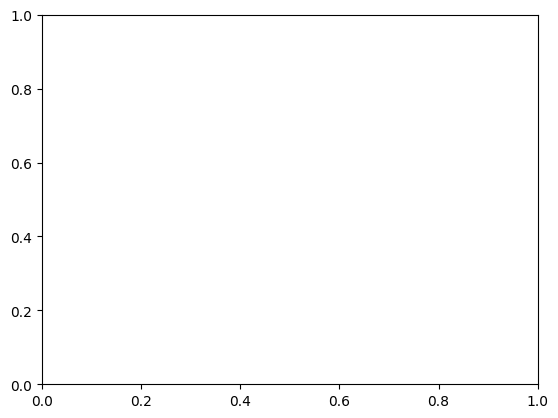

In [102]:
x = np.arange(1, 10+1)
plt.plot(x, wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4 , random_state=5, n_init='auto')

In [ ]:
y_pred = kmeans.fit_predict(X_scaled)

In [ ]:
y_pred

array([0, 0, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 3, 0, 2, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 2, 3, 2, 3, 2, 1, 2, 2, 0, 3, 3, 2, 0,
       3, 3, 0, 1, 2, 3, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 0, 2, 3, 1, 0, 3, 1, 2, 0, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 2, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0], dtype=int32)

In [ ]:
df['Group'] = y_pred

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [ ]:
df['Group'] == 3

0      False
1      False
2       True
3      False
4      False
       ...  
195    False
196     True
197    False
198    False
199    False
Name: Group, Length: 200, dtype: bool

In [ ]:
df.loc[ df['Group'] == 1 , ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
11,12,Female,35,19,99,1
13,14,Female,24,20,77,1
19,20,Female,35,23,98,1
29,30,Female,23,29,87,1
31,32,Female,21,30,73,1


In [133]:
# K-Means 2번 소비
# 여기에 어떤 csv 데이터를 넣어도 자동으로 labelencoding, onehotencodign을 해줄것이다.
import pandas as pd
df = pd.read_csv(r"https://raw.githubusercontent.com/the9world/My_Study/main/data/Data.csv") ; df
# Salary(급여)	Purchased(구입, 구매),   y가 'Purchased'나 kmeans 클러스터링

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [134]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [135]:
df = df.dropna()

In [136]:
df.reset_index(inplace = True, drop= True)

In [137]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,France,35.0,58000.0,Yes
5,France,48.0,79000.0,Yes
6,Germany,50.0,83000.0,No
7,France,37.0,67000.0,Yes


In [138]:
df.loc[ : ,  ['Country','Salary' ]  ]

,Country,Salary
0,France,72000.0
1,Spain,48000.0
2,Germany,54000.0
3,Spain,61000.0
4,France,58000.0
5,France,79000.0
6,Germany,83000.0
7,France,67000.0


In [139]:
X = df.loc[ : ,  : ]

In [140]:
X

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,France,35.0,58000.0,Yes
5,France,48.0,79000.0,Yes
6,Germany,50.0,83000.0,No
7,France,37.0,67000.0,Yes


In [ ]:
# 각 컬럼별로 문자인지 숫자인지 먼저 확인해야 한다.
# 문자열이면, 2종류인지 3종류 이상의 데이터인지를 확인한다.
# 확인이 끝나면, 레이블인코딩이나 원핫인코딩을 이용해서 숫자로 바꿔준다.

In [ ]:
X.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [144]:
X.columns[0]

'Country'

In [145]:
df[ X.columns[0] ]

0     France
1      Spain
2    Germany
3      Spain
4     France
5     France
6    Germany
7     France
Name: Country, dtype: object

In [146]:
df[ X.columns[0] ].dtype == object

True

In [147]:
df[ X.columns[0] ].nunique()

3

In [148]:
df[ X.columns[0] ]

0     France
1      Spain
2    Germany
3      Spain
4     France
5     France
6    Germany
7     France
Name: Country, dtype: object

In [149]:
# 원핫 인코딩은, 한번에 여러컬럼이 가능하므로,
# 먼저, 레이블 인코딩이 가능한 컬럼 먼저 처리를 해주고 난후에
# 원핫 인코딩을 수행한다.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [150]:
X.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [151]:
X_new = pd.DataFrame()

for name in X.columns :
  # print(name)

  # 데이터가 문자열이면, 데이터의 종류가 몇개인지 확인한다.
  if X[ name ].dtype == object :

    if X[name].nunique() >= 3 :
      # 원핫 인코딩한다.
      ct = ColumnTransformer( [('encoder', OneHotEncoder() ,[0] )] , 
                       remainder= 'passthrough' )
      
      col_names = sorted( X[name].unique() )

      X_new[col_names] = ct.fit_transform(  X[name].to_frame()  )

    else :
      # 레이블 인코딩 한다.
      label_encoder = LabelEncoder()
      X_new[name] = label_encoder.fit_transform( X[name] )
  
  # 숫자 데이터일때의 처리는 여기서
  else :
    X_new[name] = X[name]

In [152]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,France,35.0,58000.0,Yes
5,France,48.0,79000.0,Yes
6,Germany,50.0,83000.0,No
7,France,37.0,67000.0,Yes


In [153]:
X

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,France,35.0,58000.0,Yes
5,France,48.0,79000.0,Yes
6,Germany,50.0,83000.0,No
7,France,37.0,67000.0,Yes


In [154]:
X_new

,France,Germany,Spain,Age,Salary,Purchased
0,1.0,0.0,0.0,44.0,72000.0,0
1,0.0,0.0,1.0,27.0,48000.0,1
2,0.0,1.0,0.0,30.0,54000.0,0
3,0.0,0.0,1.0,38.0,61000.0,0
4,1.0,0.0,0.0,35.0,58000.0,1
5,1.0,0.0,0.0,48.0,79000.0,1
6,0.0,1.0,0.0,50.0,83000.0,0
7,1.0,0.0,0.0,37.0,67000.0,1


In [155]:
sorted( X[ X.columns[0] ].unique() )

['France', 'Germany', 'Spain']

In [156]:
  #  1         0        0
  #  0         1        0
  #  0         0        1 

In [157]:
X[ X.columns[0] ].to_frame()

,Country
0,France
1,Spain
2,Germany
3,Spain
4,France
5,France
6,Germany
7,France


In [158]:
ct = ColumnTransformer( [('encoder', OneHotEncoder() ,[0] )] , 
                       remainder= 'passthrough' )

In [159]:
ct.fit_transform(  X[ X.columns[0] ].to_frame()  )

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [160]:
sorted( X[ X.columns[0]].unique() )

['France', 'Germany', 'Spain']

In [161]:
X[ X.columns[3] ].nunique()

2

In [162]:
label_encoder = LabelEncoder()

In [163]:
label_encoder.fit_transform( X[ X.columns[3] ])

array([0, 1, 0, 0, 1, 1, 0, 1])